In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
import datetime
from netCDF4 import Dataset


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
import cartopy.crs as ccrs
import cartopy

import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from orographicPrecipitation.precip_model_functions import qsat,upslope_omega_sin
from orographicPrecipitation.precip_extremes_scaling import *
from wrfProcessing import *

import warnings
from tabulate import tabulate

In [42]:
wrfpout = xr.open_mfdataset(sorted(glob.glob(os.path.join(path,'wrfpout_d01_197*'))),combine="nested",concat_dim="Time")

In [21]:
#wrfpout=wrfpout.assign_coords(time=wrfpout["Times"])
#wrfpout=wrfpout.swap_dims({"Time":"time"})

In [105]:
def process(times):
    rep=[]
    i=0
    ti=time.time()
    for t in times:
        i+=1
        if i%1000==0:
            print(i)
        k=str(np.array(t.str.decode("utf-8")))
        rep.append(pd.to_datetime(k[:10]+" "+k[-8:]))
    print(time.time()-ti)
    return rep

In [103]:
def open_wrfds2(path):
    ds = xr.open_mfdataset(sorted(glob.glob(os.path.join(path,'wrfpout_d01_197*'))),combine="nested",concat_dim="Time")
    ds=ds.rename({'num_press_levels_stag':'level'})
    newtime=process(ds["Times"].compute())
    t=time.time()
    ds["time"]=(['Time'],  newtime)
    ds=ds.swap_dims({"Time":"time"})
    print(time.time()-t)
    return ds

In [93]:
cont_new=open_wrfds2('/global/cscratch1/sd/qnicolas/WRF/WRFV4control100km_half/test/em_beta_plane/')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
18.09872055053711
0.1357259750366211


In [106]:
warm_new=open_wrfds2('/global/cscratch1/sd/qnicolas/WRF/WRFV4control100km_half_warm/test/em_beta_plane/')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
19.534549474716187
0.11371135711669922


In [111]:
Cont_new=WrfDataset100km2(cont_new,"control_new",sel_tropicmountain)
Warm_new=WrfDataset100km2(warm_new,"warm_new",sel_tropicmountain)

loading time : 0.2 s


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)


precips time : 396.7 s
loading time : 0.2 s


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)


KeyboardInterrupt: 

In [113]:
cont_new

,Array,Chunk
Bytes,521.47 MB,5.38 MB
Shape,"(23280, 70, 80)","(240, 70, 80)"
Count,291 Tasks,97 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,521.47 MB,5.38 MB
Shape,"(23280, 70, 80)","(240, 70, 80)"
Count,291 Tasks,97 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [110]:
class WrfDataset100km2 :
    def __init__(self, variables , lbl, sel_mountain):
        self.lbl = lbl
        self.sel_mountain=sel_mountain
        
        t=time.time()
        ds = variables
        self.vars = ds.chunk({'south_north': 35,'west_east': 40,'time':800})
        #number of outputs per day
        self.nhours = len(self.vars.time.sel(time = pd.to_datetime(np.array(self.vars.time.isel(time=0))).strftime("%Y-%m-%d")))
        print("loading time : %.1f s"%(time.time()-t))
        
        self.precip_g_daily = self.nhours*self.vars.RAINNC.isel(time=range(50*self.nhours,len(self.vars.time))).diff('time').assign_coords(time = self.vars.RAINNC.time.isel(time=range(50*self.nhours,len(self.vars.time)-1))).resample(time='1D').mean().compute()
        self.precip_c_daily = self.nhours*self.vars.RAINC.isel(time=range(50*self.nhours,len(self.vars.time))).diff('time').assign_coords(time = self.vars.RAINNC.time.isel(time=range(50*self.nhours,len(self.vars.time)-1))).resample(time='1D').mean().compute()
        self.precip_daily = self.precip_g_daily + self.precip_c_daily
        print("precips time : %.1f s"%(time.time()-t))
        
    def set_extreme_precip(self,quantile):
        self.ex_pr = self.precip_daily.chunk({'time': -1}).quantile(quantile,"time")
        self.ex_pr_zonmean = self.ex_pr.mean("west_east")
    def set_extreme_vars(self,quantile):
        self.ex_w,self.ex_t,self.ex_ps = extreme_vars(self.precip_daily,
                                                      self.vars.w_p,
                                                      self.vars.T_p,
                                                      self.vars.p_sfc,
                                                      quantile
                                                     )
        self.ex_w.to_netcdf(os.path.join(self.path,self.simulation_name,'diags',self.simulation_name+'.w_p_%i_quantile.nc'%(quantile*100)))
        self.ex_t.to_netcdf(os.path.join(self.path,self.simulation_name,'diags',self.simulation_name+'.T_p_%i_quantile.nc'%(quantile*100)))
        self.ex_ps.to_netcdf(os.path.join(self.path,self.simulation_name,'diags',self.simulation_name+'.p_sfc_%i_quantile.nc'%(quantile*100)))
    def compute_ogscaling(self):
        self.ex_pr_og=ogscaling(self.ex_w,self.ex_t,self.ex_ps)
            
    def set_extreme_precip_mountain(self,quantile):
        mountain_precip = self.sel_mountain(self.precip_daily).mean(["south_north","west_east"])
        self.ex_pr_mountain = mountain_precip.chunk({'time': -1}).quantile(quantile,"time")
        self.ex_pr_mountain_all = mountain_precip.where(mountain_precip>self.ex_pr_mountain,drop=True)
    
    def set_extreme_vars_mountain(self,quantile):
        self.ex_w_mountain,self.ex_t_mountain,self.ex_ps_mountain = extreme_vars(self.sel_mountain(self.precip_daily).mean(["south_north","west_east"]),
                                                                                 self.sel_mountain(self.vars.w_p  ),
                                                                                 self.sel_mountain(self.vars.T_p  ),
                                                                                 self.sel_mountain(self.vars.p_sfc),
                                                                                 quantile
                                                                                )   
    def compute_ogscaling_mountain(self):
        self.ex_pr_mountain_og=ogscaling(self.ex_w_mountain,self.ex_t_mountain,self.ex_ps_mountain).mean(["west_east","south_north"])
    
    def compute_ogscaling_mountain_allevents(self):
        #compute 6-hourly times corresponding to extreme events
        ex_times = [pd.to_datetime(d+' {:0>2}'.format(h)) for d in list(pd.to_datetime(np.array(self.ex_pr_mountain_all.time)).strftime("%Y-%m-%d")) for h in range(0,24,24//self.nhours)]
        ex_w_mountain_all  = self.sel_mountain(self.vars.w_p.sel(time=ex_times)  )
        ex_t_mountain_all  = self.sel_mountain(self.vars.T_p.sel(time=ex_times)  )
        ex_ps_mountain_all = self.sel_mountain(self.vars.p_sfc.sel(time=ex_times))        
        self.ex_pr_mountain_og_all = ogscaling(ex_w_mountain_all,ex_t_mountain_all,ex_ps_mountain_all)
        self.ex_pr_mountain_og_all = self.ex_pr_mountain_og_all.resample(time='1D').mean(["time","west_east","south_north"] ).sel(time=self.ex_pr_mountain_all.time)

# Data

In [114]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore",FutureWarning)
    
    Mcont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","wrf.mountain.100km.1000d"  ,"Mountain, control"  ,sel_tropicmountain,open_ds=0)
    Acont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","wrf.aquaplanet.100km.1000d","Aquaplanet, control",sel_tropicmountain,open_ds=0)
    

loading time : 0.0 s
Daily precips already computed
precips time : 160.6 s
loading time : 0.0 s
Daily precips already computed
precips time : 0.4 s


In [27]:
#t=time.time()
#McontU_allt_alllevs = Mcont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#McontV_allt_alllevs = Mcont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#AcontU_allt_alllevs = Acont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#AcontV_allt_alllevs = Acont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#print(time.time()-t)
#McontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_05degmean.nc")
#McontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_05degmean.nc")
#AcontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_05degmean.nc")
#AcontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_05degmean.nc")

In [29]:
#t=time.time()
#McontW_allt_alllevs = Mcont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#AcontW_allt_alllevs = Acont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#print(time.time()-t)
#McontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_05degmean.nc")
#AcontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_05degmean.nc")


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


205.0585069656372


In [115]:
McontU_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_05degmean.nc").u_gr_p
McontV_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_05degmean.nc").v_gr_p
McontW_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_05degmean.nc").w_p

AcontU_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_05degmean.nc").u_gr_p
AcontV_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_05degmean.nc").v_gr_p
AcontW_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_05degmean.nc").w_p


AcontU_allt_alllevs=AcontU_allt_alllevs.resample(time='6H').mean()
AcontV_allt_alllevs=AcontV_allt_alllevs.resample(time='6H').mean()
AcontW_allt_alllevs=AcontW_allt_alllevs.resample(time='6H').mean()

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [116]:
t=time.time()
McontU_alllevs = McontU_allt_alllevs.mean("time")
McontV_alllevs = McontV_allt_alllevs.mean("time")
McontW_alllevs = McontW_allt_alllevs.mean("time")
AcontU_alllevs = AcontU_allt_alllevs.mean("time")
AcontV_alllevs = AcontV_allt_alllevs.mean("time")
AcontW_alllevs = AcontW_allt_alllevs.mean("time")
McontU = McontU_alllevs.sel(level=850.)
McontV = McontV_alllevs.sel(level=850.)
McontW = McontW_alllevs.sel(level=850.)
AcontU = AcontU_alllevs.sel(level=850.)
AcontV = AcontV_alllevs.sel(level=850.)
AcontW = AcontW_alllevs.sel(level=850.)
print(time.time()-t)

0.6841778755187988


In [117]:
McontU_std = McontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontV_std = McontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontW_std = McontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontU_std = AcontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontV_std = AcontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontW_std = AcontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')


In [ ]:
###############

In [119]:
t=time.time()
NMcontU_allt_alllevs = Cont_new.vars.U_PL.sel(south_north=slice(0,4)).isel(time=range(50*Cont_new.nhours,len(Cont_new.vars.time))).mean(["south_north"]).compute()
NMcontV_allt_alllevs = Cont_new.vars.V_PL.sel(south_north=slice(0,4)).isel(time=range(50*Cont_new.nhours,len(Cont_new.vars.time))).mean(["south_north"]).compute()
NMcontW_allt_alllevs = Cont_new.vars.W_PL.sel(south_north=slice(0,4)).isel(time=range(50*Cont_new.nhours,len(Cont_new.vars.time))).mean(["south_north"]).compute()

print(time.time()-t)


2634.1179876327515


In [128]:
t=time.time()
NMcontU_alllevs = NMcontU_allt_alllevs.mean("time")
NMcontV_alllevs = NMcontV_allt_alllevs.mean("time")
NMcontW_alllevs = NMcontW_allt_alllevs.mean("time")
NMcontU = NMcontU_alllevs.sel(level=7)
NMcontV = NMcontV_alllevs.sel(level=7)
NMcontW = NMcontW_alllevs.sel(level=7)
NMcontU_std = NMcontU_allt_alllevs.sel(level=7).rolling(time=400, center=True).mean().dropna("time").std('time')
NMcontV_std = NMcontV_allt_alllevs.sel(level=7).rolling(time=400, center=True).mean().dropna("time").std('time')
NMcontW_std = NMcontW_allt_alllevs.sel(level=7).rolling(time=400, center=True).mean().dropna("time").std('time')

print(time.time()-t)

21.294225215911865


# Precipitation maps

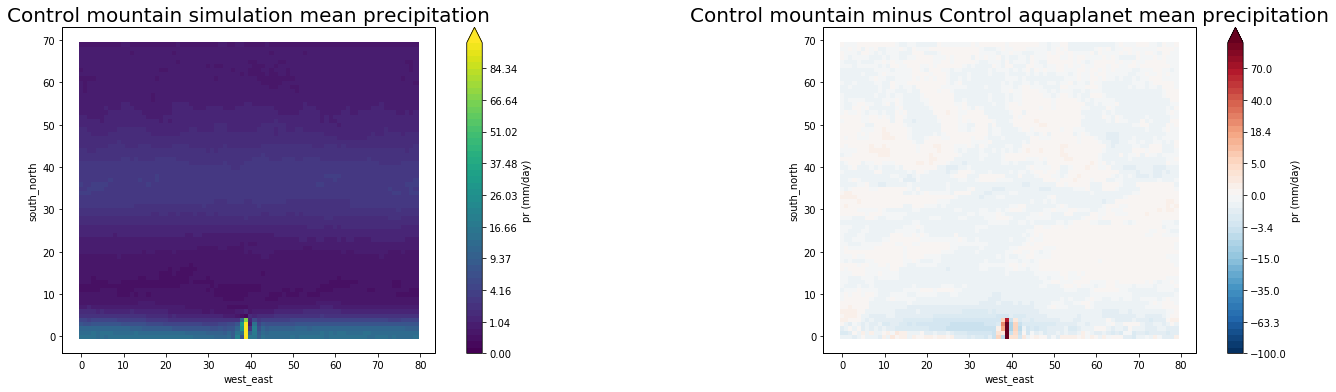

In [120]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,6),subplot_kw={'projection': ccrs.PlateCarree()})


Mcont.precip_daily.mean("time").plot(ax=ax1,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)"},levels=np.linspace(0,10.,50)**2)#,"ticks":np.arange(-0.02,0.021,0.004)})
(Mcont.precip_daily-Acont.precip_daily).mean("time").plot(ax=ax2,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)"},levels=np.sign(np.linspace(-10,10.,50))*np.linspace(-10,10.,50)**2)#,"ticks":np.arange(-0.02,0.021,0.004)})
ax1.set_title("Control mountain simulation mean precipitation",fontsize=20)
ax2.set_title("Control mountain minus Control aquaplanet mean precipitation" ,fontsize=20)

ax1.set_xticks(range(0,81,10));ax2.set_xticks(range(0,81,10))
ax1.set_yticks(range(0,71,10));ax2.set_yticks(range(0,71,10));None

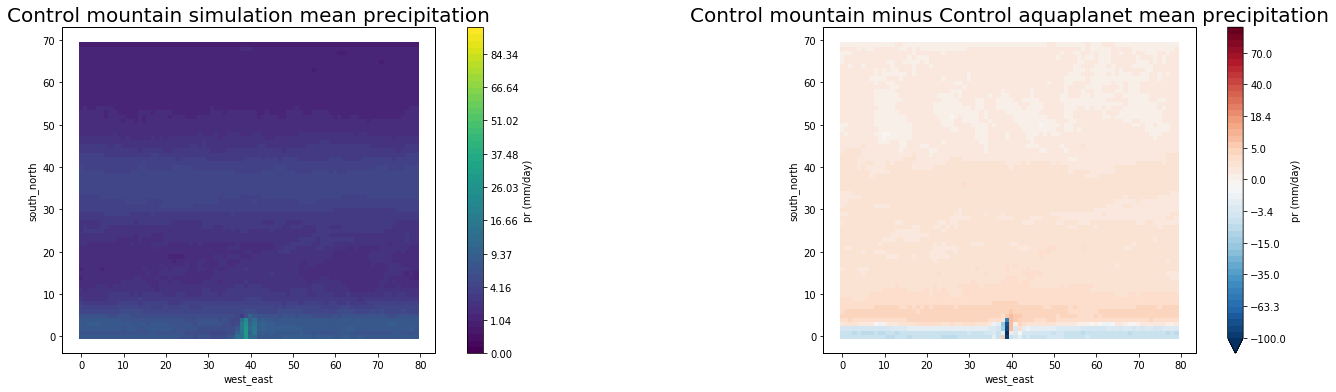

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,6),subplot_kw={'projection': ccrs.PlateCarree()})


Cont_new.precip_daily.mean("time").plot(ax=ax1,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)"},levels=np.linspace(0,10.,50)**2)#,"ticks":np.arange(-0.02,0.021,0.004)})
(Cont_new.precip_daily-Mcont.precip_daily).mean("time").plot(ax=ax2,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)"},levels=np.sign(np.linspace(-10,10.,50))*np.linspace(-10,10.,50)**2)#,"ticks":np.arange(-0.02,0.021,0.004)})
ax1.set_title("Control mountain simulation mean precipitation",fontsize=20)
ax2.set_title("Control mountain minus Control aquaplanet mean precipitation" ,fontsize=20)

ax1.set_xticks(range(0,81,10));ax2.set_xticks(range(0,81,10))
ax1.set_yticks(range(0,71,10));ax2.set_yticks(range(0,71,10));None

# Longitude plots

## Mean

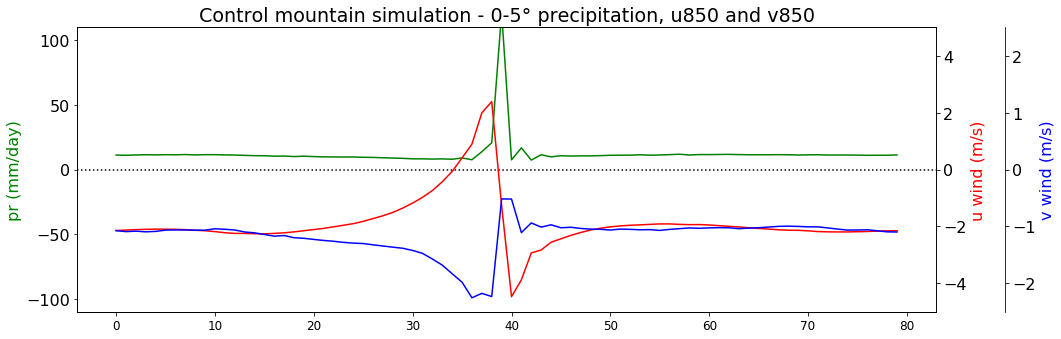

In [35]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain simulation - 0-5° precipitation, u850 and v850')

ax.plot(Mcont.precip_daily.west_east,Mcont.precip_daily.sel(south_north=slice(0,4)).mean(["time","south_north"]),'g',label='pr')
ax.set_ylabel('pr (mm/day)',color="g")
ax.set_ylim(-110.,110.)
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax.twinx()
ax2.plot(McontU.west_east,McontU,'r')
ax2.set_ylabel('u wind (m/s)', color='r') #;ax2.set_ylim(25,30)
ax2.set_ylim(-5.,5.)
    
ax3=ax.twinx()
ax3.plot(McontV.west_east,McontV,'b')
ax3.spines["right"].set_position(("axes", 1.08))
ax3.set_ylabel('v wind (m/s)', color='b')
ax3.set_ylim(-2.5,2.5)

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

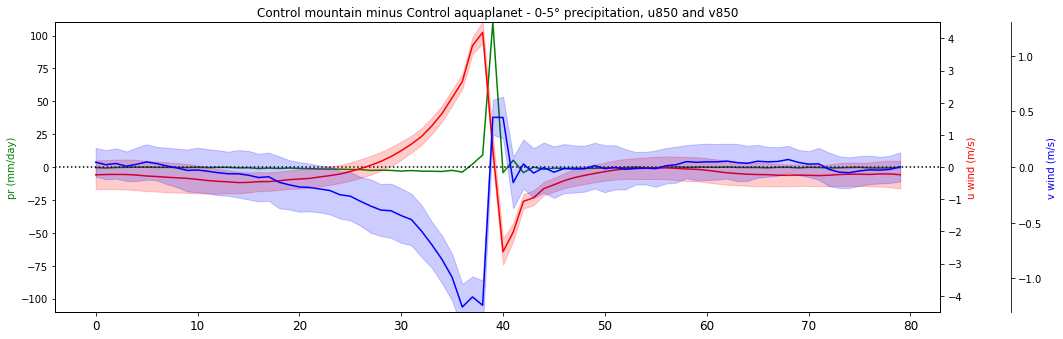

In [129]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° precipitation, u850 and v850')

ax.plot(Mcont.precip_daily.west_east,(Mcont.precip_daily-Acont.precip_daily).sel(south_north=slice(0,4)).mean(["time","south_north"]),'g',label='pr')
ax.set_ylabel('pr (mm/day)',color="g")
ax.set_ylim(-110.,110.)
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax.twinx()
ax2.plot(McontU.west_east,McontU-AcontU,'r')
ax2.fill_between(McontU.west_east, McontU-AcontU-McontU_std, McontU-AcontU+McontU_std,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax2.set_ylabel('u wind (m/s)', color='r')
ax2.set_ylim(-4.5,4.5)
    
ax3=ax.twinx()
ax3.plot(McontV.west_east,McontV-AcontV,'b')
ax3.fill_between(McontV.west_east, McontV-AcontV-McontV_std, McontV-AcontV+McontV_std,
                 facecolor="b",
                 color='b',   
                 alpha=0.2)  
ax3.spines["right"].set_position(("axes", 1.08))
ax3.set_ylabel('v wind (m/s)', color='b')
ax3.set_ylim(-1.3,1.3)

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

In [123]:
NMcont=Cont_new

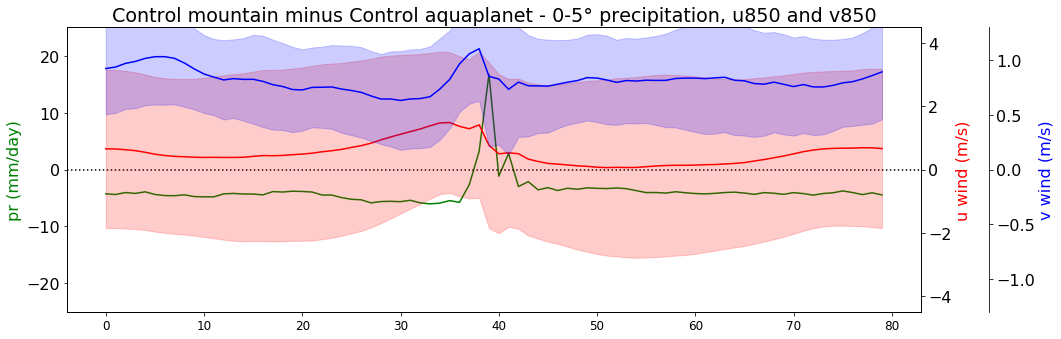

In [130]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° precipitation, u850 and v850')

ax.plot(NMcont.precip_daily.west_east,(NMcont.precip_daily-Acont.precip_daily).sel(south_north=slice(0,4)).mean(["time","south_north"]),'g',label='pr')
ax.set_ylabel('pr (mm/day)',color="g")
ax.set_ylim(-25.,25.)
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax.twinx()
ax2.plot(NMcontU.west_east,NMcontU-AcontU,'r')
ax2.fill_between(NMcontU.west_east, NMcontU-AcontU-NMcontU_std, NMcontU-AcontU+NMcontU_std,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax2.set_ylabel('u wind (m/s)', color='r')
ax2.set_ylim(-4.5,4.5)
    
ax3=ax.twinx()
ax3.plot(NMcontV.west_east,NMcontV-AcontV,'b')
ax3.fill_between(NMcontV.west_east, NMcontV-AcontV-NMcontV_std, NMcontV-AcontV+NMcontV_std,
                 facecolor="b",
                 color='b',   
                 alpha=0.2)  
ax3.spines["right"].set_position(("axes", 1.08))
ax3.set_ylabel('v wind (m/s)', color='b')
ax3.set_ylim(-1.3,1.3)

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

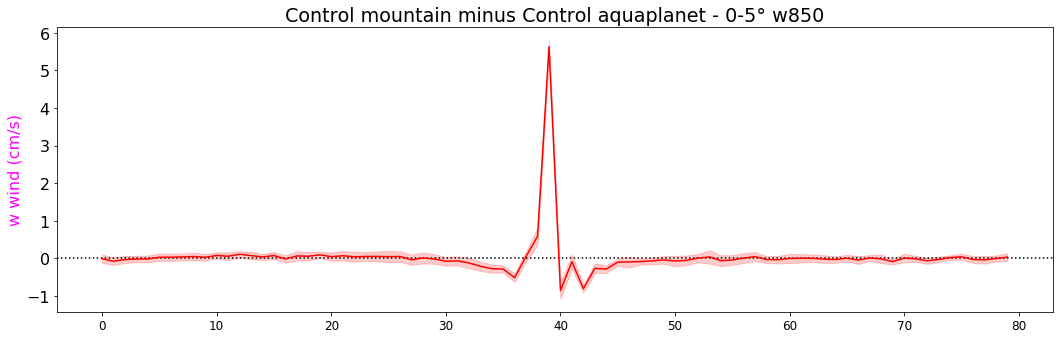

In [37]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° w850')

ax.axhline(0.,linestyle=':',color='k')
ax.plot(McontW.west_east,(McontW-AcontW)*100,'r')
ax.fill_between(McontW.west_east, (McontW-AcontW-McontW_std)*100, (McontW-AcontW+McontW_std)*100,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax.set_ylabel('w wind (cm/s)', color='magenta')
#ax.set_ylim(-4.5,4.5)
    
matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

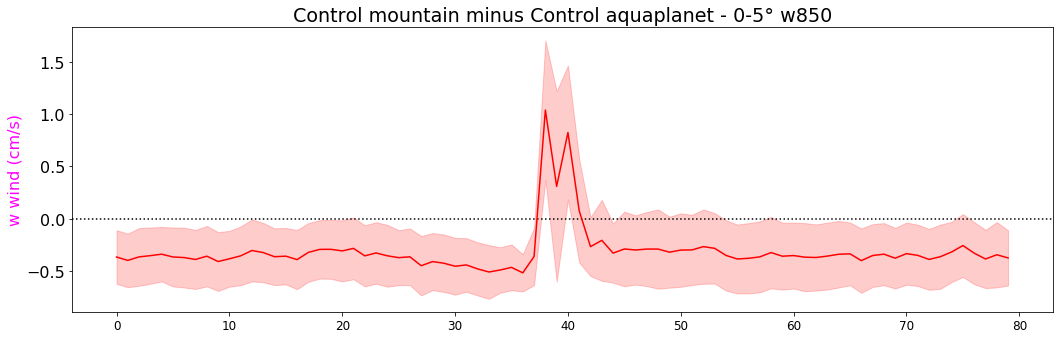

In [131]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° w850')

ax.axhline(0.,linestyle=':',color='k')
ax.plot(NMcontW.west_east,(NMcontW-AcontW)*100,'r')
ax.fill_between(NMcontW.west_east, (NMcontW-AcontW-NMcontW_std)*100, (NMcontW-AcontW+NMcontW_std)*100,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax.set_ylabel('w wind (cm/s)', color='magenta')
#ax.set_ylim(-4.5,4.5)
    
matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()

## Seasonal

In [99]:
McontUs = [McontU_allt.isel(time=range(max(i,0),min(i+364,3800))).mean('time') for i in range(-30,3800,364)]
AcontUs = [AcontU_allt.isel(time=range(max(i,0),min(i+364,3790))).mean('time') for i in range(-30,3800,364)]
McontVs = [McontV_allt.isel(time=range(max(i,0),min(i+364,3800))).mean('time') for i in range(-30,3800,364)]
AcontVs = [AcontV_allt.isel(time=range(max(i,0),min(i+364,3790))).mean('time') for i in range(-30,3800,364)]

lbls=["DJF year 1",
      "MAM year 1",
      "JJA year 1",
      "SON year 1",
      "DJF year 2",
      "MAM year 2",
      "JJA year 2",
      "SON year 2",
      "DJF year 3",
      "MAM year 3",
      "JJA year 3",
     ]

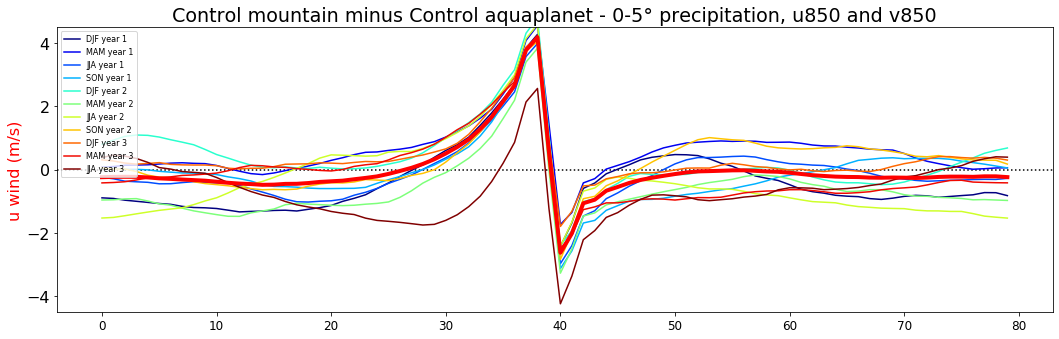

In [98]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° v850')
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax

ax2.set_ylabel('u wind (m/s)', color='r')
ax2.set_ylim(-4.5,4.5)
clrs=plt.cm.jet(np.linspace(0,1,11))
for i,(a,m) in enumerate(zip(AcontUs,McontUs)):
    ax2.plot(McontU.west_east,m-a,color = clrs[i],label = lbls[i]) 
ax2.plot(McontU.west_east,McontU-AcontU,'r',linewidth=4)     

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
ax2.legend(fontsize=8)

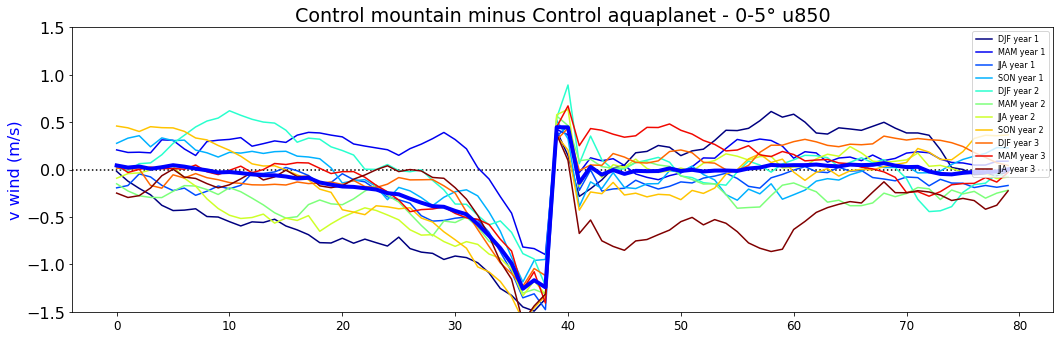

In [103]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° u850')
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax

ax2.set_ylabel('v wind (m/s)', color='b')
ax2.set_ylim(-1.5,1.5)
clrs=plt.cm.jet(np.linspace(0,1,11))
for i,(a,m) in enumerate(zip(AcontVs,McontVs)):
    ax2.plot(McontV.west_east,m-a,color = clrs[i],label = lbls[i]) 
ax2.plot(McontV.west_east,McontV-AcontV,'b',linewidth=4)     

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
ax2.legend(fontsize=8)

# 2D longitude/pressure plots

In [133]:
def plot_lon_lev(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax, x='west_east',yincrease=False)
    else :
        (Mcont-Acont).plot(ax=ax, x='west_east',yincrease=False,levels=lvls)
    ax.set_title(lbl)
   

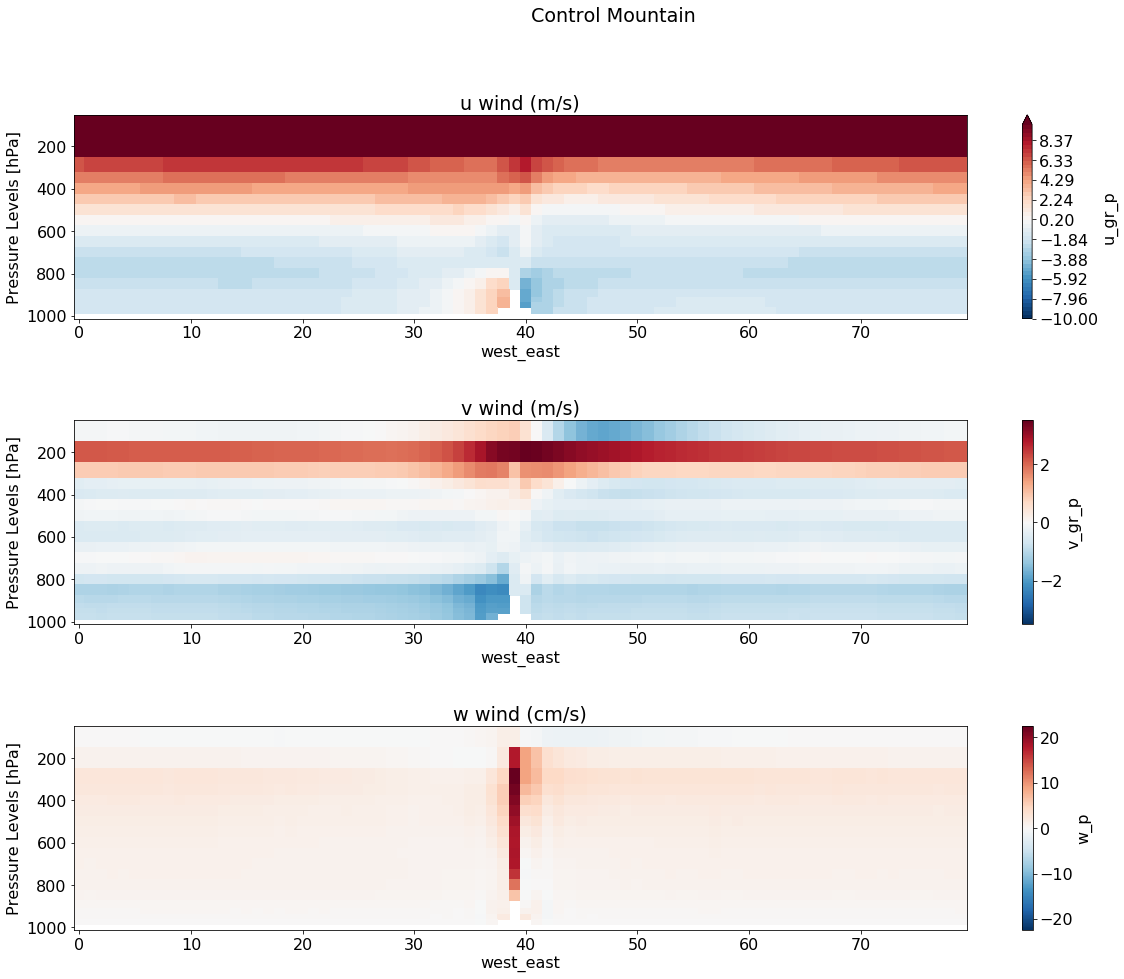

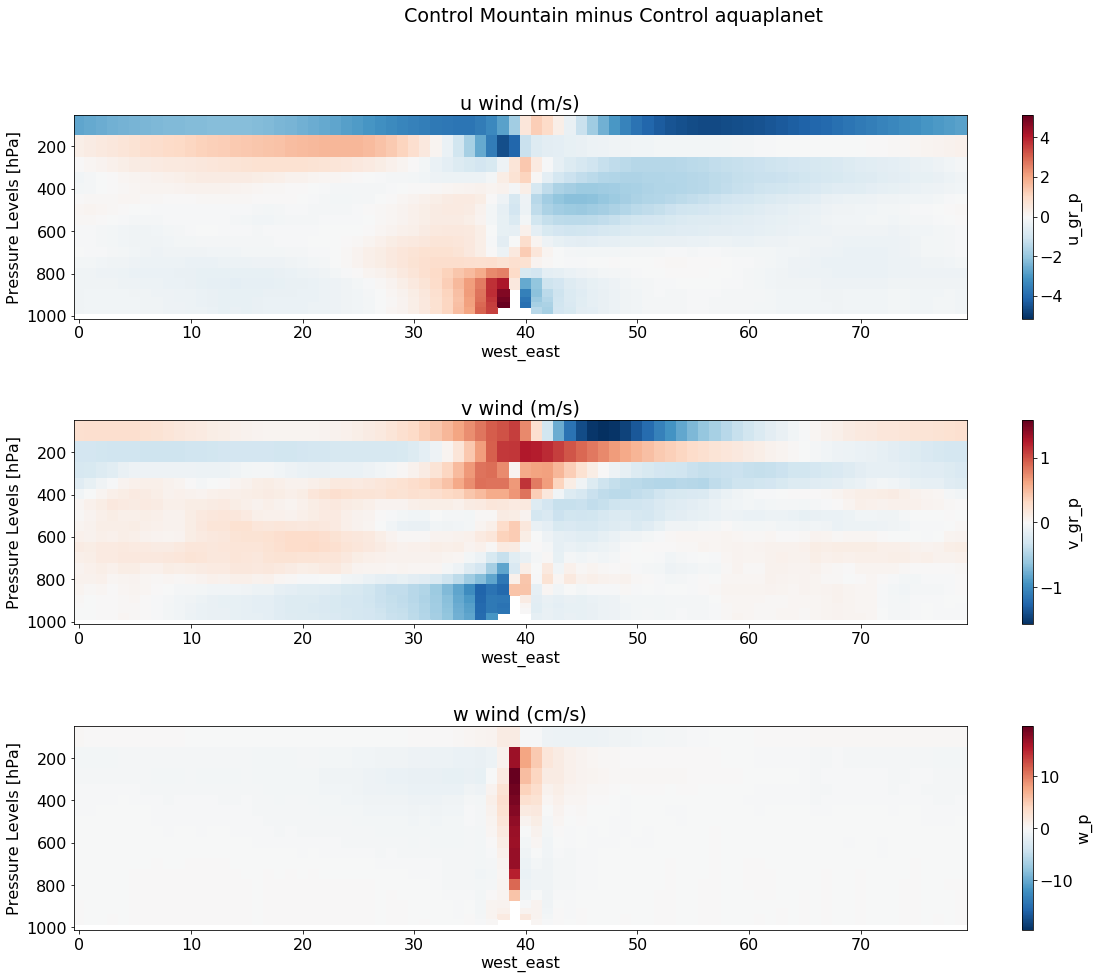

In [49]:
 
fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(McontU_alllevs,0.,ax[0],"u wind (m/s)",np.linspace(-10.,10.))
plot_lon_lev(McontV_alllevs,0.,ax[1],"v wind (m/s)")
plot_lon_lev(100*McontW_alllevs,0.,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain");None

#era5mf.plot(ax=ax[i][0], x='month',yincrease=False,cbar_kwargs={"label":"Mass flux (kg/m2/s)","ticks":np.arange(-lvls[i][1],lvls[i][1]+1e-6,lvls[i][2])},cmap=plt.cm.RdBu_r,levels=np.linspace(-lvls[i][0],lvls[i][0]))



fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(McontU_alllevs,AcontU_alllevs,ax[0],"u wind (m/s)")
plot_lon_lev(McontV_alllevs,AcontV_alllevs,ax[1],"v wind (m/s)")
plot_lon_lev(100*McontW_alllevs,100*AcontW_alllevs,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain minus Control aquaplanet");None

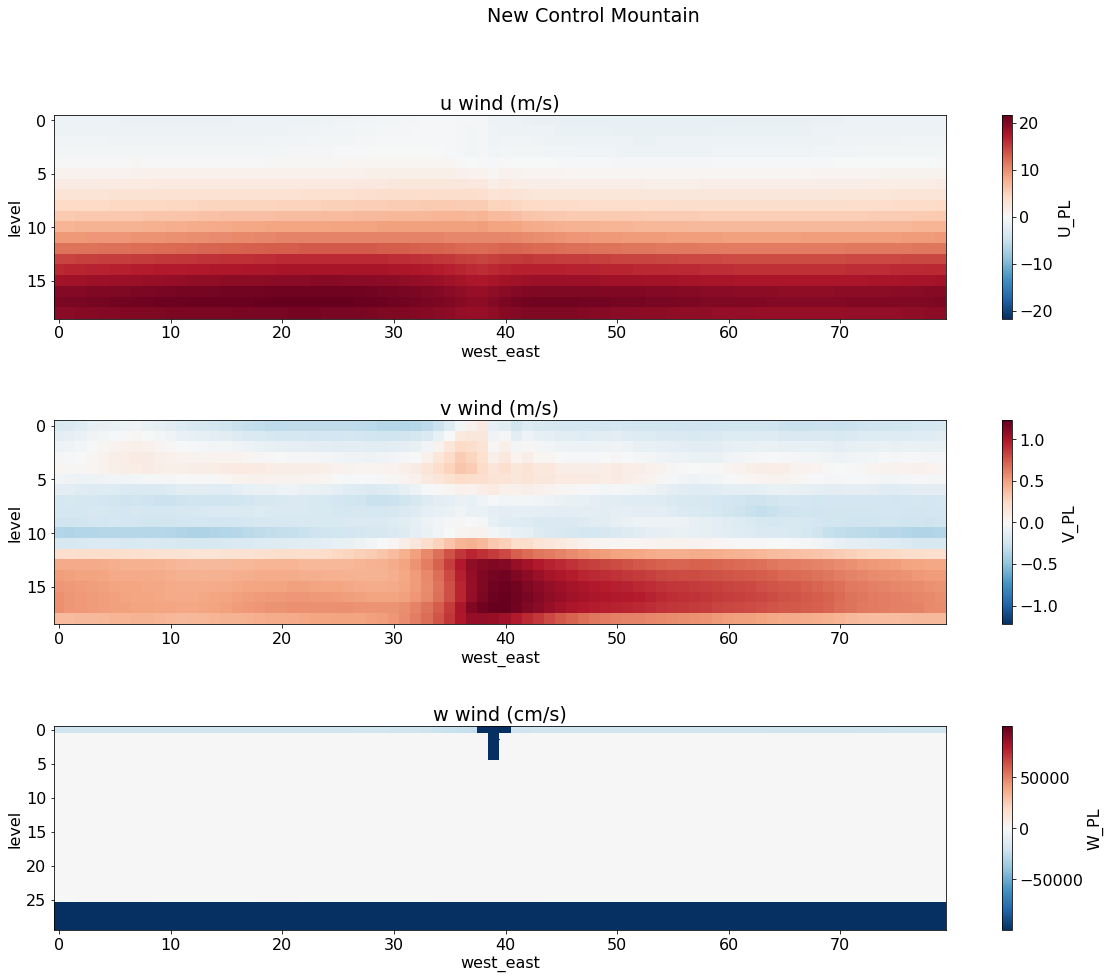

In [138]:
 
fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(NMcontU_alllevs.sel(level=range(7,26)),0.,ax[0],"u wind (m/s)")
plot_lon_lev(NMcontV_alllevs.sel(level=range(7,26)),0.,ax[1],"v wind (m/s)")
plot_lon_lev(100*NMcontW_alllevs,0.,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("New Control Mountain");None

#era5mf.plot(ax=ax[i][0], x='month',yincrease=False,cbar_kwargs={"label":"Mass flux (kg/m2/s)","ticks":np.arange(-lvls[i][1],lvls[i][1]+1e-6,lvls[i][2])},cmap=plt.cm.RdBu_r,levels=np.linspace(-lvls[i][0],lvls[i][0]))



#fig, ax = plt.subplots(3,1,figsize=(20,15))
#plot_lon_lev(NMcontU_alllevs,AcontU_alllevs,ax[0],"u wind (m/s)")
#plot_lon_lev(NMcontV_alllevs,AcontV_alllevs,ax[1],"v wind (m/s)")
#plot_lon_lev(100*NMcontW_alllevs,100*AcontW_alllevs,ax[2],"w wind (cm/s)")
#plt.subplots_adjust(hspace=0.5)
#fig.suptitle("New Control Mountain minus Control aquaplanet");None

## Hadley circulation

In [27]:
#t=time.time()
#McontU_allt_alllevs = Mcont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#McontV_allt_alllevs = Mcont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#AcontU_allt_alllevs = Acont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#AcontV_allt_alllevs = Acont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#print(time.time()-t)
#McontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_05degmean.nc")
#McontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_05degmean.nc")
#AcontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_05degmean.nc")
#AcontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_05degmean.nc")

In [ ]:
#t=time.time()
#McontW_allt_alllevs = Mcont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#AcontW_allt_alllevs = Acont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#print(time.time()-t)
#McontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_05degmean.nc")
#AcontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_05degmean.nc")


In [8]:
#t=time.time()
#temp = Mcont.vars.w_p.resample(time='5D').mean()
#McontW_alllevs_alllats = temp.isel(time=range(10,len(temp.time))).mean(["time"]).compute()
#McontW_alllevs_alllats.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_tmean.nc")
#print(time.time()-t)

AttributeError: 'WrfDataset100km' object has no attribute 'vars'

In [73]:
#t=time.time()
#temp = Acont.vars.w_p.resample(time='1D').mean()
#AcontW_alllevs_alllats = temp.isel(time=range(50,len(temp.time))).mean(["time"]).compute()
#AcontW_alllevs_alllats.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_tmean.nc")
#print(time.time()-t)

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


165.56598448753357


In [9]:
McontU_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_tmean.nc").u_gr_p
McontV_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_tmean.nc").v_gr_p
McontW_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_tmean.nc").w_p

AcontU_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_tmean.nc").u_gr_p
AcontV_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_tmean.nc").v_gr_p
AcontW_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_tmean.nc").w_p


In [10]:
def plot_lat_lev(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax, x='south_north',yincrease=False)
    else :
        (Mcont-Acont).plot(ax=ax, x='south_north',yincrease=False,levels=lvls)
    ax.set_title(lbl)
    

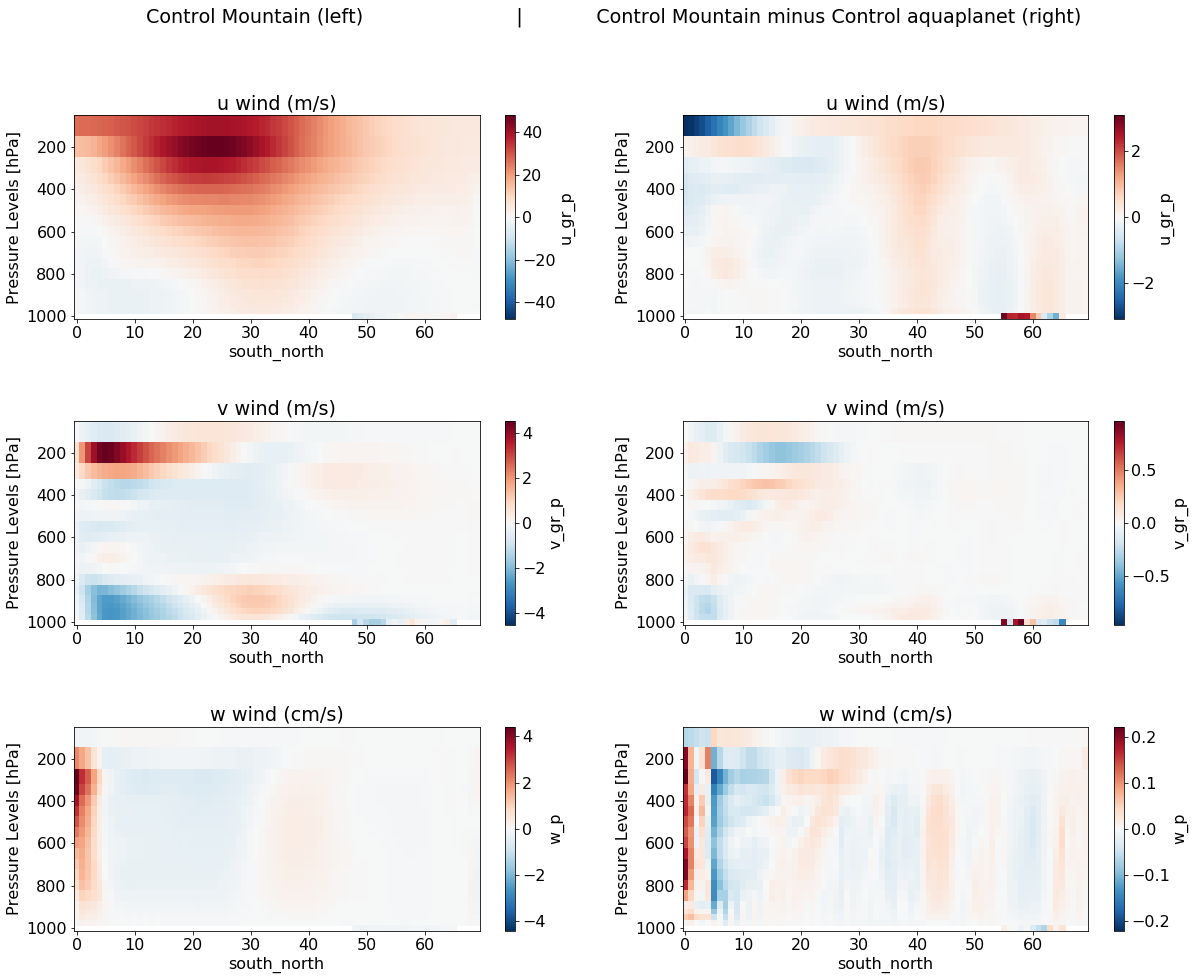

In [83]:
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lev(McontU_alllevs_alllats.mean("west_east"),0.,ax[0][0],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev(McontV_alllevs_alllats.mean("west_east"),0.,ax[1][0],"v wind (m/s)")
plot_lat_lev(100*McontW_alllevs_alllats.mean("west_east"),0.,ax[2][0],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lev(McontU_alllevs_alllats.mean("west_east"),AcontU_alllevs_alllats.mean("west_east"),ax[0][1],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev(McontV_alllevs_alllats.mean("west_east"),AcontV_alllevs_alllats.mean("west_east"),ax[1][1],"v wind (m/s)")
plot_lat_lev(100*McontW_alllevs_alllats.mean("west_east"),100*AcontW_alllevs_alllats.mean("west_east"),ax[2][1],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None

In [11]:
def plot_lat_lon(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax)
    else :
        (Mcont-Acont).plot(ax=ax,levels=lvls)
    ax.set_title(lbl)
  

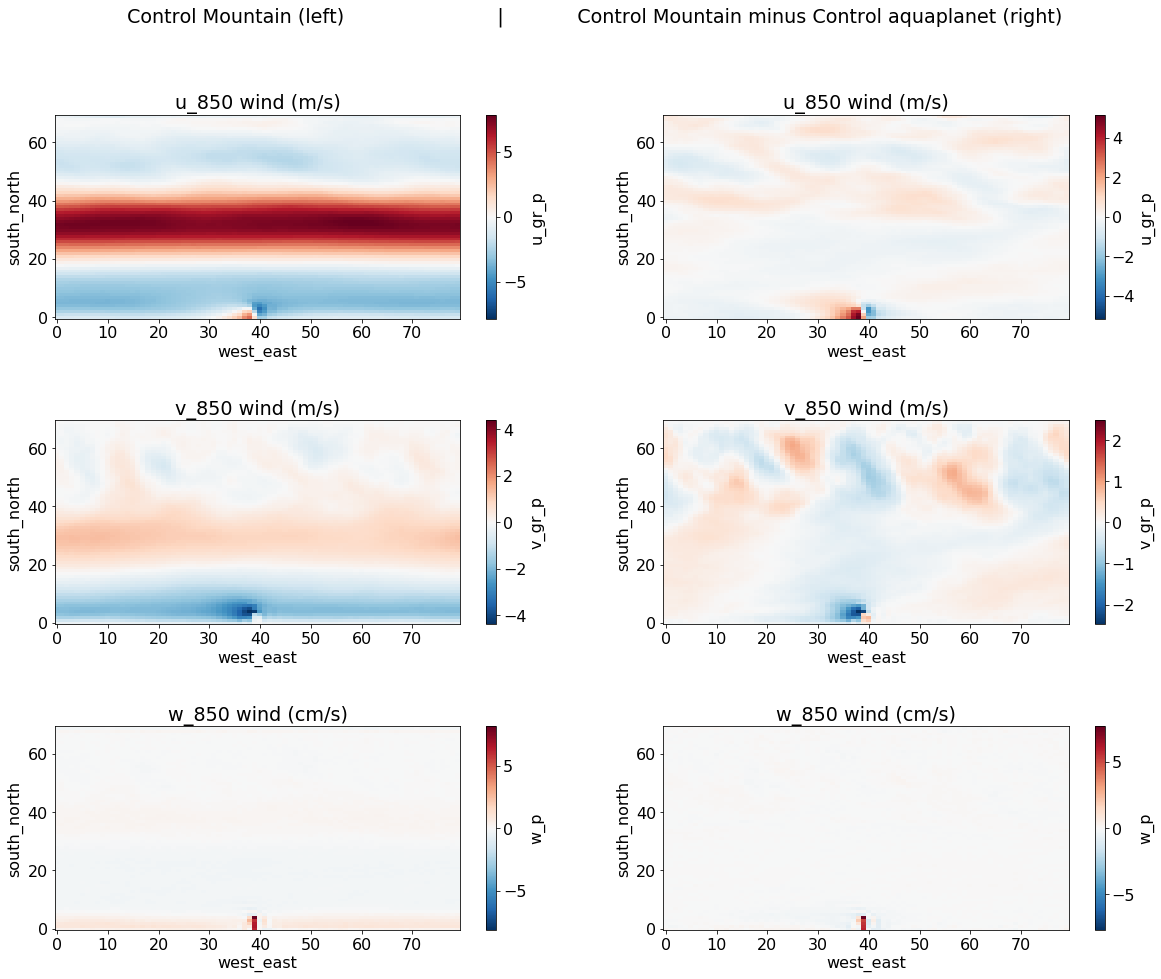

In [88]:
  
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=850.),0.,    ax[0][0],"u_850 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=850.),0.,    ax[1][0],"v_850 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=850.),0.,ax[2][0],"w_850 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=850.),AcontU_alllevs_alllats.sel(level=850.),        ax[0][1],"u_850 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=850.),AcontV_alllevs_alllats.sel(level=850.),        ax[1][1],"v_850 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=850.),100*AcontW_alllevs_alllats.sel(level=850.),ax[2][1],"w_850 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None

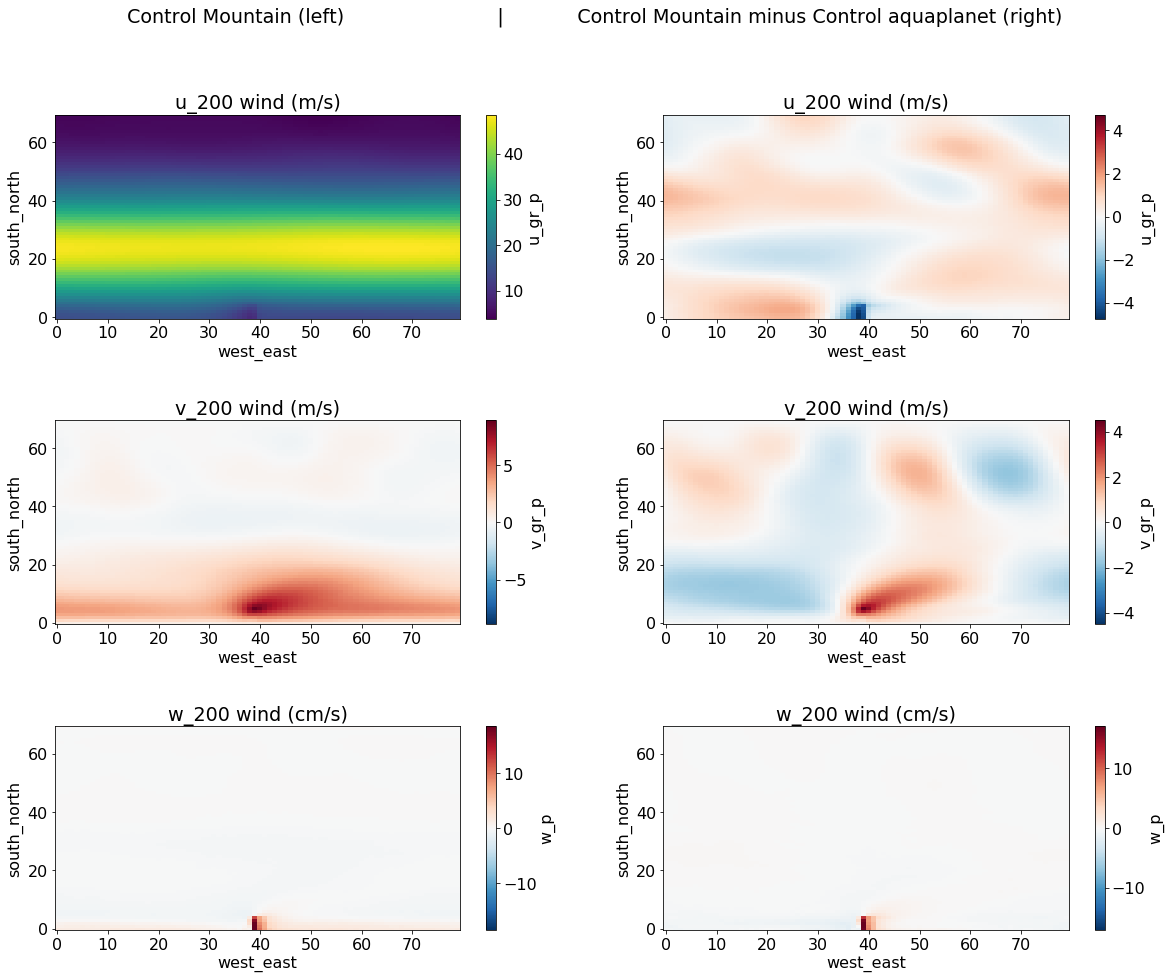

In [16]:
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=200.),0.,    ax[0][0],"u_200 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=200.),0.,    ax[1][0],"v_200 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=200.),0.,ax[2][0],"w_200 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=200.),AcontU_alllevs_alllats.sel(level=200.),        ax[0][1],"u_200 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=200.),AcontV_alllevs_alllats.sel(level=200.),        ax[1][1],"v_200 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=200.),100*AcontW_alllevs_alllats.sel(level=200.),ax[2][1],"w_200 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None
